## Test notebook for synthetic stellar spectra comparison with MUSE

# Goal
Set up a prototype to get a spectrum from a synthetic library, then smooth and resample it at the correct MUSE resolution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

#%run SynthOptSpec/synspec.py
sys.path.append('./')
from SynthOptSpec import SynSpec

ModuleNotFoundError: No module named 'astropy'

# TODOs
This is the list of what remains to be done:
- Initial problem: from Spec -> estimate Teff, Logg
    - [DONE] create a training set for Teff, Logg
    - [DONE] basically we convert the full spectral database in a set of smoothed/resampled spectra with Teff, Logg labels
    - [DONE] then we build an interpolator that, given the database, will create a spectrum for any given Teff, Logg pair
    - [DONE] Further complication: include extinction (Av) and accretion veiling (lines?).
    - Need to add option for veiling (eg starting with Dominika prescription of constant flux, fraction of flux at 7500
    - Need to consider adding the option of mixing atmospheres (eg. Dusty and Settl, in the low T range).
- Full inversion: from L, Spec -> estimate (M, t), as well as the other intermediate parameters (such as Av, Logg, Teff, veil):
    - Need to define the space of the parameters
    - interface with the pmstracks module: given (M, t) construct the corresponding L, Teff, Logg
    - build a random sampler to create the set of (M, t) for the training set
    - organize the sampled spectra in a proper database
- Final complication: from (mags, spectra) -> (M, t, Av, Lacc)


In [4]:
myteff = 4500.
def get_spec_file(teff):
    teffstr = str(int(teff/100))
    if teff<1000.:
        teffstr = '00'+teffstr
    elif teff<10000.:
        teffstr = '0'+teffstr
    Z = '0'
    LogG = '5'
    specfile = 'bt-settl/lte'+teffstr+'-'+LogG+'-'+Z+'a+0.0.BT-NextGen.7.dat.txt'
    #specfile = 'testdata/test.dat.txt'
    return specfile

#R=4000.

specfile = get_spec_file(myteff)

testpar = {
    'file' : specfile,
    'wlmin' : 4000.,
    'wlmax' : 9800.,
    'wledge' : 10.,
    'R' : 4000.,
    'format' : 'txt',
    'modflux_log' : False,
}
#print(testpar['file'])
testpar['file'] = '../testdata/test.dat.txt'

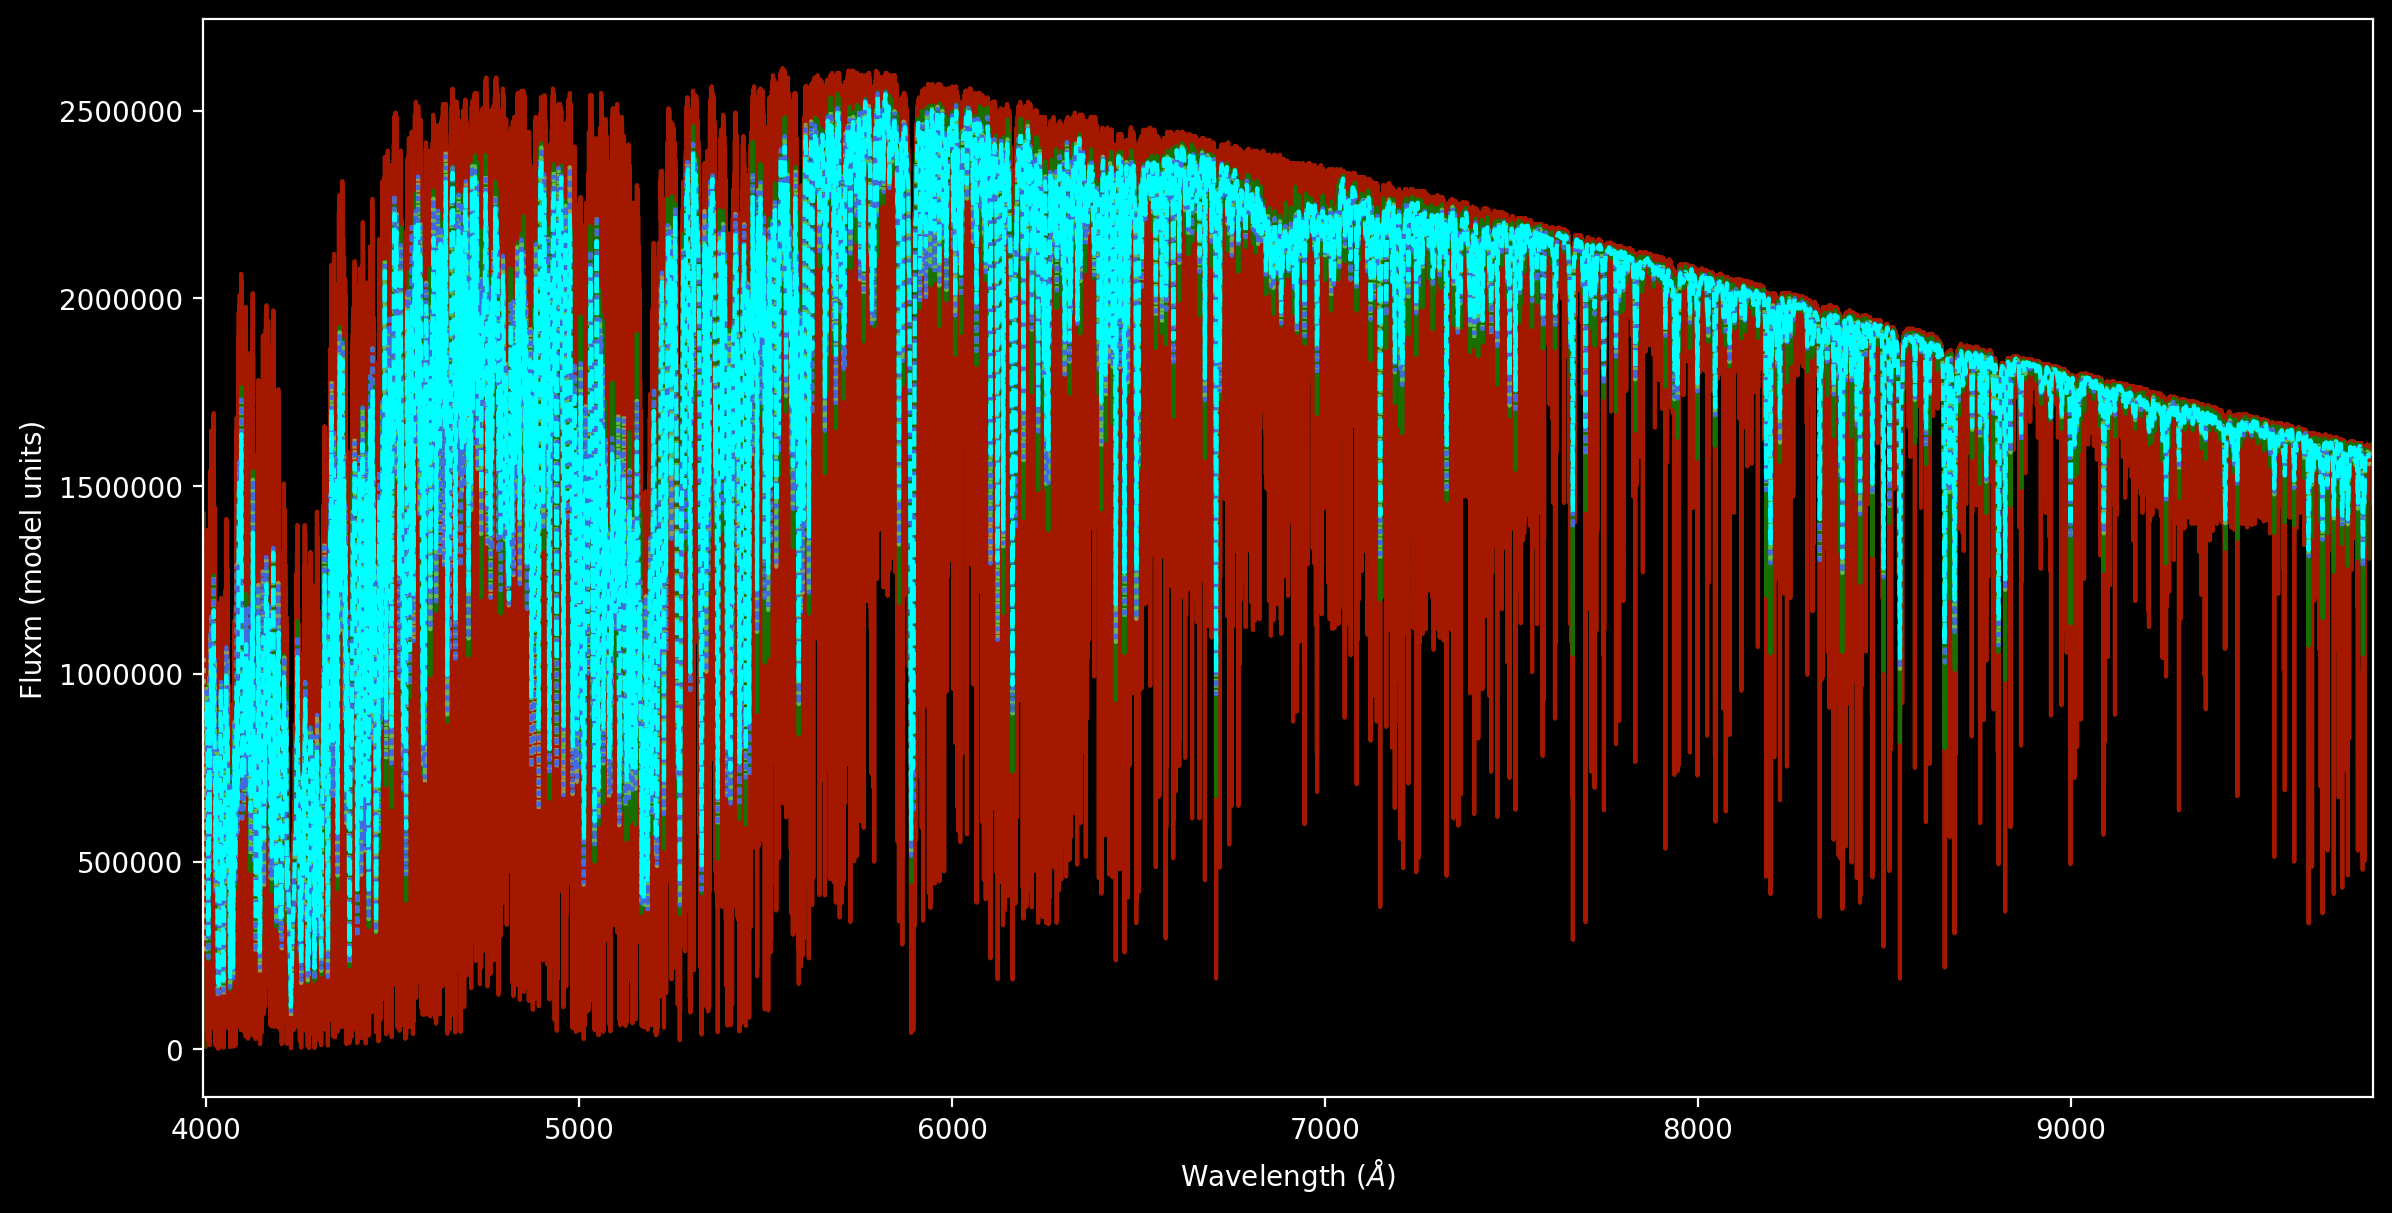

In [5]:

# define spectrum reading the file
test = SynSpec(testpar)
# smooth to a resolution R
test.smoothspec(testpar['R'])
# resample
wlres = np.arange(4000.,9800.,1.3)
test.resample(wlres,smoothed=True)
# plot the result
test.plotspec(smoothed=True, resampled=True, showedge=True)

